In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [3]:
!which python

/usr/bin/python


In [6]:
budget = 10000
env = "RiverSwim-continuous"
particles = [2,4,6,8,10,12,14,16,18,20]

df = pd.read_csv("../data/{}/pf_{}/data_eval_pf_{}_{}.csv".format(env,budget,env,budget))
df['type'] = ["pf"]*df.shape[0]
df

,agent,total_reward,discounted_reward,length,budget,type
0,2_pf,0.0035,0.003340,10,10000,pf
1,2_pf,0.0030,0.002811,10,10000,pf
2,2_pf,0.0040,0.003791,10,10000,pf
3,2_pf,0.0035,0.003301,10,10000,pf
4,2_pf,0.0000,0.000000,10,10000,pf
...,...,...,...,...,...,...
995,20_pf,0.0020,0.001855,10,10000,pf
996,20_pf,0.0045,0.004281,10,10000,pf
997,20_pf,0.0050,0.004781,10,10000,pf
998,20_pf,0.0050,0.004781,10,10000,pf


In [9]:
df_dpw = pd.read_csv("../data/{}/dpw_{}/dpw_mcts_only_{}_{}_data_exp_0.csv".format(env,budget,env,budget))
df_dpw['type'] = ["dpw"]*df_dpw.shape[0]
df_dpw['agent'] = ["dpw"]*df_dpw.shape[0]
df_dpw

,agent,total_reward,discounted_reward,length,budget,type
0,dpw,0.0045,0.004291,10,10000,dpw
1,dpw,0.0035,0.003296,10,10000,dpw
2,dpw,0.0045,0.004281,10,10000,dpw
3,dpw,0.0040,0.003791,10,10000,dpw
4,dpw,0.0040,0.003786,10,10000,dpw
...,...,...,...,...,...,...
95,dpw,0.0040,0.003786,10,10000,dpw
96,dpw,0.0030,0.002811,10,10000,dpw
97,dpw,0.0030,0.002811,10,10000,dpw
98,dpw,2.0000,1.854997,10,10000,dpw


In [11]:
df2 = pd.read_csv("../data/{}/paper_{}/data.csv".format(env,budget))
df2 = df2[~df2.agent.isin(['agent'])].apply(pd.to_numeric, errors='ignore')
df2 = df2.sort_values(by="agent")
df2['type'] = ["paper"]*df2.shape[0]

#dfs = [df2.copy(deep=True) for _ in range(len(particles))]

#for i in range(len(particles)):
#    dfs[i]['Particles'] = [particles[i]] * dfs[i].shape[0]
    

df3 = pd.concat([df, df2, df_dpw], ignore_index=True)
df3 = df3.sort_values(by="agent")

df3

,agent,total_reward,discounted_reward,length,budget,type,seed,return,pit
498,10_pf,0.0030,0.002811,10,10000,pf,NaN,NaN,NaN
472,10_pf,0.0040,0.003786,10,10000,pf,NaN,NaN,NaN
471,10_pf,0.0040,0.003786,10,10000,pf,NaN,NaN,NaN
470,10_pf,0.0000,0.000000,10,10000,pf,NaN,NaN,NaN
469,10_pf,1.0000,0.932065,10,10000,pf,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1062,random,0.0020,NaN,10,10000,paper,474391473.0,0.001927,4.0
1061,random,0.0020,NaN,10,10000,paper,474391470.0,0.001883,6.0
1060,random,0.0000,NaN,10,10000,paper,474391469.0,0.000000,2.0
1070,random,0.0020,NaN,10,10000,paper,474391476.0,0.001932,4.0


Saving total_reward plot to ../data/RiverSwim-continuous/riverswim-continuous_total_reward_10000.png


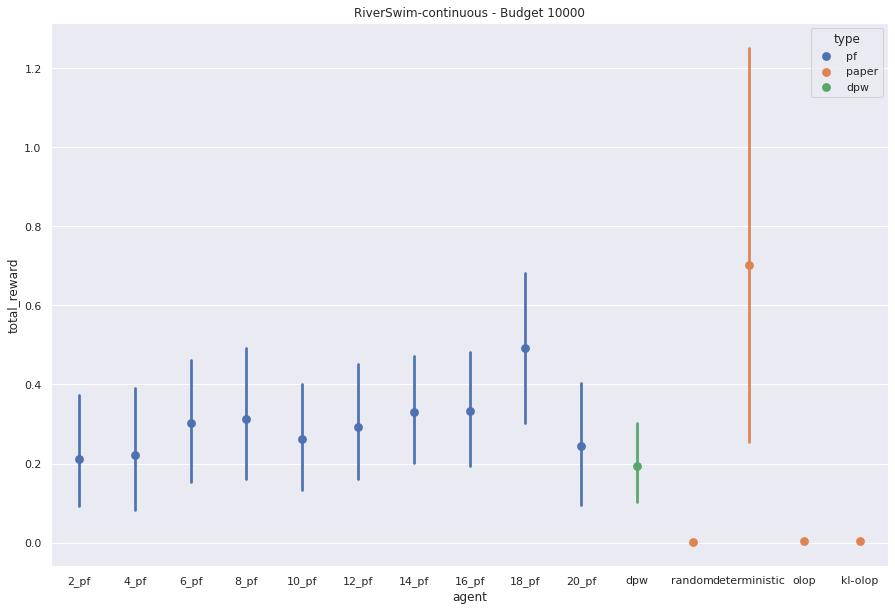

In [14]:
# print("Reading data from {}".format(data_path))
# df = pd.read_csv(data_path)
# df = df[~df.agent.isin(['agent'])].apply(pd.to_numeric, errors='ignore')
#df = df.sort_values(by="Particles")

#fig, ax = plt.subplots()
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
# ax.set(xscale="log")
# sns.barplot(x="Particles", y="Cumulative reward", hue="Particles", data=df, dodge=False)
#sns.pointplot(x="Particles", y="Cumulative reward", ax=ax, data=df, join=False, grid=True)
plot = sns.pointplot(x="agent", y="total_reward", data=df3, hue="type", legend=False, join=False,
                    order=["2_pf", "4_pf", "6_pf", "8_pf", "10_pf", "12_pf", "14_pf","16_pf","18_pf","20_pf", "dpw", "random", "deterministic", "olop", "kl-olop"])
#plot2 = sns.pointplot(x="agent", y="total_reward", hue="type", data=df, legend=False)

plot.set_title("{} - Budget {}".format(env, budget))


field_path = "../data/{}/{}_total_reward_{}.png".format(env, env.lower(), budget)
plot.get_figure().savefig(field_path, bbox_inches='tight')
# plt.show()
print("Saving total_reward plot to {}".format(field_path))

In [15]:
plt.figure(figsize=(15, 10))


plot = sns.pointplot(x="agent", y="pit_count", data=df3, hue="type", legend=False, join=False,
                        order=["2_pf", "4_pf", "6_pf", "8_pf", "10_pf", "12_pf", "14_pf","16_pf","18_pf","20_pf", "dpw", "random", "deterministic", "olop", "kl-olop"])
#plot2 = sns.pointplot(x="agent", y="total_reward", hue="type", data=df, legend=False)

plot.set_title("{} - Budget {}".format(env, budget))


field_path = "../data/{}/{}_pit_count_{}.png".format(env, env.lower(), budget)
plot.get_figure().savefig(field_path, bbox_inches='tight')
# plt.show()
print("Saving pit_count plot to {}".format(field_path))

ValueError: Could not interpret input 'pit_count'

<Figure size 1080x720 with 0 Axes>

In [19]:
data  = pd.read_csv("../rl_agents_scripts/out/river_swim_continuous/data.csv")
deterministic = data[data['agent'] == 'deterministic']

In [25]:
deterministic['total_reward']

42    4.0000
48    1.0010
50    0.0050
53    0.0050
58    0.0050
60    0.0050
62    3.0005
67    0.0050
68    1.0010
69    0.0050
70    0.0050
71    3.0000
72    1.0015
73    1.0000
74    0.0050
75    0.0050
76    0.0050
77    0.0050
78    0.0050
79    0.0050
Name: total_reward, dtype: float64

In [24]:
np.std(deterministic['total_reward']) / np.sqrt(20)

0.26511078556897683